# Example 5-4: Time and frequency relations in digital simulations



In previous examples the following two simulation techniques was shown. 


### Simulation using sum of cosines

The following formula can obtain realizations of the stochastic process.

$$x(t) = \sum_{n=1}^{N}  A_k \cos (\omega_kt + \phi_k) $$

$$A_k = \sqrt{2 S_x(\omega_k) \Delta \omega} $$

Here $S_x(\omega_k)$ is the auto-spectral density of the process, and $\phi_k$ is a random phase angle evenly distributed between $0$ and $2\pi$.


### Simulation using IFFT

The most efficient method for time domain realization(s) of a stationary stochastic process was the IFFT-based simulation:


$$x(t) = \Re \left(\sum_{n=1}^{N}  A_k e^{i (\omega_kt + \phi_k)} \right)$$

$$x(t) = \Re \left(\sum_{n=1}^{N}  A_k e^{i \phi_k}e^{i \omega_kt}  \right)$$

$$x(t) = \Re \left(IFFT \left( A_k e^{i \phi_k} \right) \right)$$


### Relation among time and frequency axis


How can we decide the frequency vector and is it related to the time vector of the simulation?

We usually simulate using a one-sided spectrum $S(\omega)$. The (positive) frequency vector $\mathbf{\omega}$ is interspaced by $\Delta \omega$ and has $N$ elements:

$$
\omega=
  \underbrace{
  [\Delta \omega,2 \Delta \omega,3 \Delta \omega,\dots,\omega_\text{max}]
  }_{ N \: \text{elements}}
  , \quad \omega_\text{max}=N \Delta \omega
$$

The time duration of the simulation is determined by the frequency component with the longest period (or equivalently, lowest frequency $\Delta f$).

$$
  T=\frac{1}{\Delta f}=\frac{2 \pi}{\Delta \omega}
$$

The time vector $\mathbf{t}$ in the simulation consists of $N$ elements , the same as the frequency vector $\mathbf{\omega}$. This is because the length of the input to the FFT/IFFT and its output is the same.

$$
\mathbf{t}=
  \underbrace{
  [0,\Delta t,2 \Delta t,3 \Delta t,\dots,T]
  }_{ N \: \text{elements}}
$$

The time interspacing $\Delta t$ thus becomes: 

$$
  \Delta t=\frac{T}{N-1}=
  \frac{2 \pi}{(N-1) \Delta \omega}
$$

When we want to generate a realization with duration $T$ and interspacing $\Delta t$, we implictly define this through the frequency axis. We have to select:

$$
  \Delta \omega=\frac{2 \pi}{T}
$$

$$
N=\dfrac{T}{\Delta t}+1 
$$


$$
 \omega_\text{max}=N\Delta \omega
$$







### Simulation

We will simulate from the spectrum:

$$ S_X(\omega) =  \left\{ \begin{array}{c}  \sigma_x^2/(\omega_2-\omega_1) \quad  \omega_1 \le \omega \le \omega_2 \\ 0 \quad \omega<\omega_1 \\ 0 \quad \omega>\omega_2 \end{array} \right. 
\quad \quad
$$

where $\omega_1=0.9$ and $\omega_2=1$. The targets are set as $T=600 \: \text{s}$ and $\Delta dt=0.02 \: \text{s}$. 


The frequency spacing dw is 0.010471975511965976 rad/s
The frequency maximum w_max is 314.16973733449123 rad/s


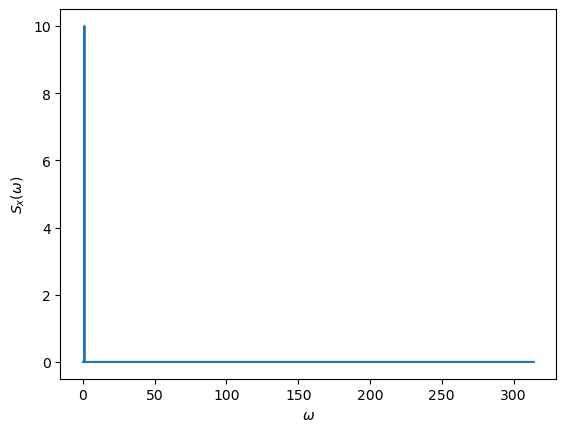

In [2]:
import numpy as np
from matplotlib import pyplot as plt

T=600.0
dt=0.02

dw=2*np.pi/T

N=T/dt+1 # This should be an integer (T/dt is an integer number of samples)

w_max=N*dw

w = np.arange(dw,w_max+dw,dw); # (Positive) frequency axis

w1 = 0.9 # Low cut-off frequency
w2 = 1.0 # Low cut-off frequency
sigma_x= 1.0 # Standard deviation of the process
Sx = np.ones(w.shape[0])*sigma_x**2/(w2-w1) # Value of the one-sided auto-spectral density
Sx[w<w1] = 0 # Set the auto-spectral density to zero below w1
Sx[w>w2] = 0 # Set the auto-spectral density to zero above w2


plt.figure()
plt.plot(w,Sx);
plt.ylabel('$S_x(\omega)$');
plt.xlabel('$\omega$');

print('The frequency spacing dw is ' + str(dw) + ' rad/s')
print('The frequency maximum w_max is ' + str(w_max) + ' rad/s')



We see that the spectrum goes all the way to 300 rad/s, even though we are interested in around 1 rad/s.

Let's simulate a time series.

The simulation duration is 600.0 s
The simulation dt is 0.02 s


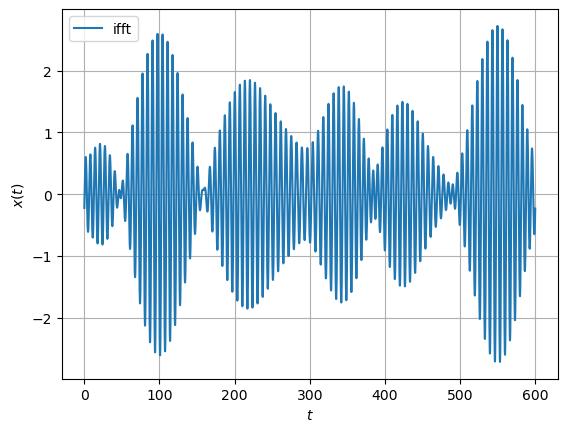

In [29]:
# IFFT-based simulation

phi = np.random.rand(w.shape[0])*2*np.pi # Random phase angles 
c = (2*Sx*dw)**0.5*np.exp(1j*phi) # The complex amplitude inclusing the phase angle
xifft = np.real(np.fft.ifft(c)*w.shape[0]) # The ifft
tifft = np.linspace(0,2*np.pi/dw,w.shape[0]) # time axis

plt.figure()
plt.plot(tifft,xifft,label = 'ifft')
#plt.xlim((0,600));
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend();

print('The simulation duration is ' + str(tifft[-1]) + ' s')
print('The simulation dt is ' + str(tifft[1]-tifft[0]) + ' s')

